In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

from konlpy.tag import Okt
import re

In [2]:
data = pd.read_csv('풀무원 바른먹거리.csv',encoding='UTF=8',index_col = 0)

In [3]:
data=data.dropna()

In [6]:
data

,언론사,제목,내용
0,경향신문,‘바른 먹거리’ 풀무원 물류센터에서는 무슨 일이?,지난 16일 사회관계망서비스에서는 차밑에 들어가 있는 한 노동자의 사진이 화제를 모...
1,경향신문,"어린이 ‘바른 먹거리 캠페인’ 신청하세요… 풀무원, 사회공헌 교육 확대",풀무원이 어린이들의 바른 식생활을 위해 2010년부터 실시해온 ‘바른 먹거리 캠페인...
2,경향신문,"풀무원, 어린이 바른 먹거리 현장 체험교육",풀무원 홀딩스는 초등학교 여름방학을 맞아 충북 음성 풀무원 두부공장을 돌아보는 ‘풀...
3,경향신문,풀무원 ‘바른 먹을거리 교육’에 어린이 신청 늘어,어린이를 대상으로 한 올바른 먹을거리 교육이 학교와 학부모들로부터 관심을 모으고 있...
4,경향신문,"풀무원, 13년 만에 새 CI 발표... 글로벌 로하스 도약 목표",풀무원 새 풀무원이 2005년 이후 13년 만에 기업이미지를 교체했다 계열사 브랜드...
...,...,...,...
248,한겨례,“일 25씩 더 해 기부하면 세계 굶주림 사라져”,“세상의 아름다움 중에서 인간의 아름다움을 딛고 넘어설 만한 아름다움은 없다고 생각...
249,한국일보,냉면·짜장·떡볶이 제품에 트레이가 필요한가요,"['쓰레기를 사지 않을 권리15즉석조리식품 트레이', '기후위기와 쓰레기산에 신음하..."
250,한국일보,풀무원 입사 1호 사원이 … 성장세 발목 잡던 해외 실적도 개선,"['원혜영 의원 부친 농장 남승우 前대표가 기업화', '‘바른 먹거리’로 年 매출 ..."
251,한국일보,풀무원 13년 만에 기업이미지 바꿔… 계열사 브랜드도 통일,['풀무원이 2005년 이후 13년 만에 기업이미지를 교체하고 계열사 브랜드 체계를...


In [7]:
def get_nouns(text):
    nouns = okt.nouns(text)
    nouns = [word for word in nouns if len(word) > 1] # 명사중 길이가 1 이상만
    nouns = [word for word in nouns if not re.match(r'\d+',word)] # 숫자 제거
    return nouns

In [8]:
okt = Okt()

cv = TfidfVectorizer(max_features=1000, tokenizer=get_nouns)
tfidf = cv.fit_transform(data['내용'].values.astype('U'))
print('tfidf : ',tfidf)

tfidf :    (0, 776)	0.1236920911401057
  (0, 408)	0.020040995385771594
  (0, 387)	0.0564323028693885
  (0, 274)	0.02040465744763598
  (0, 483)	0.020532949960549916
  (0, 139)	0.03235189179569249
  (0, 920)	0.1502315259480002
  (0, 587)	0.2555274857857616
  (0, 978)	0.31940935723220204
  (0, 621)	0.04982730222429708
  (0, 296)	0.18356612907757203
  (0, 436)	0.01865199390656063
  (0, 285)	0.025758198383624364
  (0, 852)	0.061936979534108906
  (0, 785)	0.030161557403231887
  (0, 904)	0.0638818714464404
  (0, 351)	0.02532272008989176
  (0, 800)	0.32999758368588605
  (0, 456)	0.02491365111214854
  (0, 736)	0.03356077123571454
  (0, 345)	0.026223732725367432
  (0, 397)	0.02287398927932422
  (0, 989)	0.17115005518744336
  (0, 575)	0.08017134472563482
  (0, 937)	0.025758198383624364
  :	:
  (249, 539)	0.0849615429581892
  (249, 573)	0.04483115771622682
  (249, 751)	0.04483115771622682
  (249, 47)	0.04672213644209781
  (249, 133)	0.038372840987888734
  (249, 984)	0.04321131913805424
  (249, 416

In [9]:
tfidf = tfidf.toarray()

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
num_clusters = list(range(1, len(data)+1))
SSE=[]
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    km = KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(tfidf)
    SSE.append(km.inertia_)

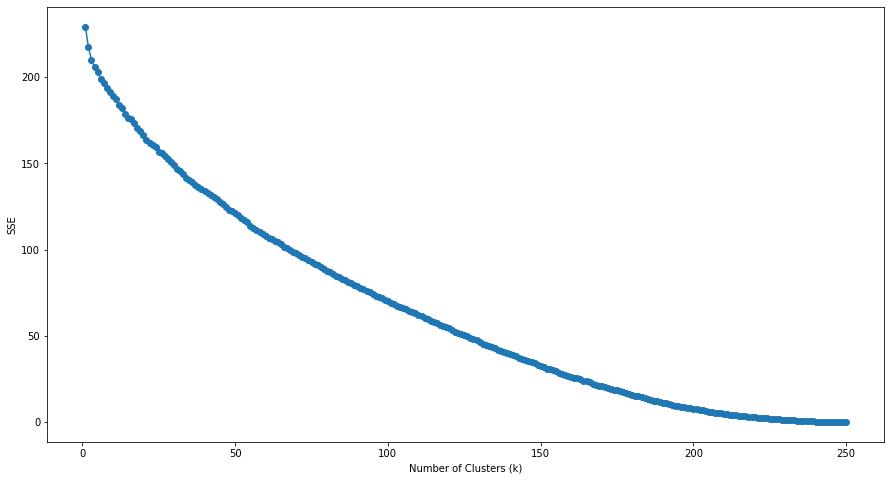

In [13]:
# K에 따른 inertia의 변화를 시각화합니다
plt.figure(figsize=(15,8))
plt.plot(num_clusters, SSE, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.xticks([0,50,100,150,200,250])
plt.ylabel('SSE')
plt.show()

In [14]:
km = KMeans(n_clusters=60)
km.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=60, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
data['cluster'] = km.labels_
data.head()

,언론사,제목,내용,cluster
0,경향신문,‘바른 먹거리’ 풀무원 물류센터에서는 무슨 일이?,지난 16일 사회관계망서비스에서는 차밑에 들어가 있는 한 노동자의 사진이 화제를 모...,11
1,경향신문,"어린이 ‘바른 먹거리 캠페인’ 신청하세요… 풀무원, 사회공헌 교육 확대",풀무원이 어린이들의 바른 식생활을 위해 2010년부터 실시해온 ‘바른 먹거리 캠페인...,51
2,경향신문,"풀무원, 어린이 바른 먹거리 현장 체험교육",풀무원 홀딩스는 초등학교 여름방학을 맞아 충북 음성 풀무원 두부공장을 돌아보는 ‘풀...,8
3,경향신문,풀무원 ‘바른 먹을거리 교육’에 어린이 신청 늘어,어린이를 대상으로 한 올바른 먹을거리 교육이 학교와 학부모들로부터 관심을 모으고 있...,29
4,경향신문,"풀무원, 13년 만에 새 CI 발표... 글로벌 로하스 도약 목표",풀무원 새 풀무원이 2005년 이후 13년 만에 기업이미지를 교체했다 계열사 브랜드...,4


In [23]:
for cluster_num in set(km.labels_):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = data[data['cluster'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['제목']:
            print(title) # 제목으로 살펴보자
        print()

cluster num : 1
풀무원 ‘바른먹거리 캠페인’ 하반기 교육 대폭 확대실시
꼬마들이 채소에 빠진 까닭은
풀무원재단, ‘바른먹거리 확인 캠페인’ 하반기 교육 확대 실시
풀무원, 교과부와 ‘밥상머리교육·바른먹거리 실천’ 캠페인
“건강한 밥상 바른 인성 기르자”

cluster num : 2
497개 기업 슈퍼주총
풀무원, ‘2019년 DJSI평가’ 글로벌 식품 기업 중 2년 연속 10위권
창사 35주년 풀무원식품, 글로벌 지주회사 지배구조체제 확립 선언
풀무원, ‘동아시아 30’에 3년 연속 선정
풀무원, 제18회 윤경 ESG 포럼 ‘서울 ESG CEO 선언’ 참여… ESG 실천 다짐
2021 최대 화두는 'ESG 경영'…지속 가능한 경영 앞장서는 식품 브랜드 눈길
풀무원, 2020년 ESG 평가 최우수기업상 수상…식품기업 최초 4년 연속 A+등급
위원회 출범하고 도…식품업계 경영 속도

cluster num : 3
올가, 친환경 먹을거리 매장 확장
풀무원 올가홀푸드, 친환경 농업 공로 '농림축산식품부 장관 표창' 수상
올가홀푸드, 메쉬코리아와 친환경 배송을 위한 MOU 체결
풀무원 올가홀푸드, 농림부 장관상 수상
풀무원 올가홀푸드, 친환경 농업 발전 공로 '농림축산식품부 장관 표창' 수상
올가홀푸드 ‘창립 40주년 행사’ 개최… 최대 50 할인
풀무원 올가홀푸드 ‘네이버 장보기’에 친환경 식품점으로 입점
풀무원 올가홀푸드 의성군과 함께하는 ‘제10회 우수 농산물 기획전’ 개최
중소기업 강국 코리아㉝ 우리원식품… 오색 빛‘ 쌀’ 건강이야기

cluster num : 4
풀무원, 13년 만에 새 CI 발표... 글로벌 로하스 도약 목표
풀무원, 13년 만에 CI 교체 ‘제2 도약’
풀무원, 새 CI 발표…“글로벌 로하스기업으로 도약”
풀무원 새 발표…식품·친환경 의지 강조
풀무원 13년 만에 기업이미지 바꿔… 계열사 브랜드도 통일

cluster num : 5
[2016 추석선물] 풀무원샵, 100여종 추석선물 최대 64% 할인
풀무원녹즙 셀프 건강 관리 